# TELCO Customer Retention    

# I. Data Exploration

In [92]:
# import data
import pandas as pd
telco_churn = pd.read_csv("C:/Users/13161/Desktop/data.csv") # from local file

print(telco_churn.head())
print(telco_churn.describe())

telco_churn = telco_churn[telco_churn.tenure != 0]
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn.TotalCharges)

obj_df = telco_churn.select_dtypes(include=['object']).copy()

print(telco_churn.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [93]:
## convert all string variables into int categorical variables
import matplotlib.pyplot as plt

print(obj_df.head())

for column in obj_df:
    print(obj_df[column].value_counts())

obj_df['gender'] = pd.get_dummies(pd.Series(obj_df['gender']))
obj_df['Partner'] = pd.get_dummies(pd.Series(obj_df['Partner']))
obj_df['PhoneService'] = pd.get_dummies(pd.Series(obj_df['PhoneService']))
obj_df['PaperlessBilling'] = pd.get_dummies(pd.Series(obj_df['PaperlessBilling']))
obj_df['Churn'] = pd.get_dummies(pd.Series(obj_df['Churn']))

dummy_vars = ['customerID','gender', 'Partner', 'PhoneService', 'PaperlessBilling', 'Churn']
num_vars = ['customerID','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

obj_df2 = obj_df.select_dtypes(include=['object']).copy()

cleanup_nums = {"MultipleLines": {"No": 0, "No phone service": 1, "Yes": 2},
                "InternetService": {"No": 0, "DSL": 1, "Fiber optic": 2},
                "OnlineSecurity": {"No": 0, "No internet service": 1, "Yes": 2},
                "OnlineBackup": {"No": 0, "No internet service": 1, "Yes": 2},
                "Dependents": {"No": 0, "Yes": 1},
                "DeviceProtection": {"No": 0, "No internet service": 1, "Yes": 2},
                "TechSupport": {"No": 0, "No internet service": 1, "Yes": 2},
                "StreamingTV": {"No": 0, "No internet service": 1, "Yes": 2},
                "StreamingMovies": {"No": 0, "No internet service": 1, "Yes": 2},
                "Contract": {"Month-to-month": 0, "One year": 1, "Two year": 2},
                "PaymentMethod": {"Electronic check": 1, "Mailed check": 2, 
                                  "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}
               }

obj_df2.replace(cleanup_nums, inplace = True)
print(obj_df2.head())

   customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No 

In [94]:
dummy_df = obj_df[dummy_vars]
num_df = telco_churn[num_vars]

df2 = dummy_df.merge(num_df, left_on='customerID', right_on='customerID', how='left')
telco_churn_clean = df2.merge(obj_df2, left_on='customerID', right_on='customerID', how='left')
print(telco_churn_clean.head())

   customerID  gender  Partner  PhoneService  PaperlessBilling  Churn  \
0  7590-VHVEG       1        0             1                 0      1   
1  5575-GNVDE       0        1             0                 1      1   
2  3668-QPYBK       0        1             0                 0      0   
3  7795-CFOCW       0        1             1                 1      1   
4  9237-HQITU       1        1             0                 0      0   

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges      ...        \
0              0       1           29.85         29.85      ...         
1              0      34           56.95       1889.50      ...         
2              0       2           53.85        108.15      ...         
3              0      45           42.30       1840.75      ...         
4              0       2           70.70        151.65      ...         

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                1               0      

In [3]:
# identify target variable 'Churn'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv("C:/Users/13161/Desktop/telco_churn_clean.csv")
X = data.loc[:, ['gender','Partner','PhoneService','PaperlessBilling','SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']] # Specify attributes/predictors
y = data.Churn         

In [3]:
# make sure we select correctly
print(X.head())

   gender  Partner  PhoneService  PaperlessBilling  SeniorCitizen  tenure  \
0       0        1             0                 1              0       1   
1       1        0             1                 0              0      34   
2       1        0             1                 1              0       2   
3       1        0             0                 0              0      45   
4       0        0             1                 1              0       2   

   MonthlyCharges  TotalCharges  Dependents  MultipleLines  InternetService  \
0           29.85         29.85           0              1                1   
1           56.95       1889.50           0              0                1   
2           53.85        108.15           0              0                1   
3           42.30       1840.75           0              1                1   
4           70.70        151.65           0              0                2   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport

In [2]:
# basic description of data
data.describe()

,Unnamed: 0,gender,Partner,PhoneService,PaperlessBilling,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.482509,0.903299,0.592719,0.265785,0.162400,32.421786,64.798208,2283.300441,...,0.940557,1.224118,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,2.315557
std,2030.107879,0.500014,0.499729,0.295571,0.491363,0.441782,0.368844,24.545260,30.085974,2266.771362,...,0.948627,0.778643,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,1.149523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1757.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,35.587500,401.450000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3515.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,5273.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,55.000000,89.862500,3794.737500,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A30F531390>,
      dtype=object)

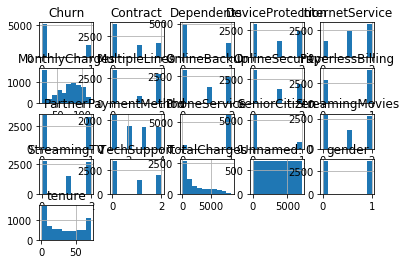

In [3]:
# see the distribution of all variables
data.hist()

,Churn,Unnamed: 0,gender,Partner,PhoneService,PaperlessBilling,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
Churn,1,0.0101292,-0.00854464,-0.149982,0.0116914,0.191454,0.150541,-0.354049,0.192858,-0.199484,-0.163128,0.0380433,0.31635,-0.28905,-0.19529,-0.177883,-0.282232,-0.0363027,-0.0388017,-0.39615,-0.262918
Unnamed: 0,0.0101292,1,-0.00846311,0.000156947,-0.0282688,0.00213772,0.00806095,0.00679772,-0.0129368,0.00181922,-0.00476167,-0.0065227,-0.00589737,-0.00105158,0.00410203,-0.00635823,0.00862906,-0.00067599,-0.0171971,0.00394969,-0.0134316
gender,-0.00854464,-0.00846311,1,-0.00137905,-0.00751498,-0.0119019,-0.00181939,0.00528537,-0.0137793,4.78395e-05,0.0103489,-0.00690809,-0.00964271,-0.0148995,-0.0119199,0.00134838,-0.00669458,-0.00562367,-0.00892015,9.46992e-05,-0.00492753
Partner,-0.149982,0.000156947,-0.00137905,1,0.0183972,-0.0139567,0.0169566,0.381912,0.097825,0.319072,0.452269,0.142717,0.000938123,0.15061,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,0.13328
PhoneService,0.0116914,-0.0282688,-0.00751498,0.0183972,1,0.0166961,0.00839161,0.00787733,0.248033,0.113008,-0.00107781,-0.0205037,0.0941822,-0.0141626,0.0240403,0.00471818,-0.0181357,0.056393,0.0430251,0.00301869,-0.00310643
PaperlessBilling,0.191454,0.00213772,-0.0119019,-0.0139567,0.0166961,1,0.156258,0.00482316,0.35193,0.15783,-0.110131,0.165306,0.377644,-0.157723,-0.0126974,-0.0375958,-0.113617,0.0973785,0.0839008,-0.175475,-0.10179
SeniorCitizen,0.150541,0.00806095,-0.00181939,0.0169566,0.00839161,0.156258,1,0.0156835,0.219874,0.102411,-0.21055,0.146287,0.25903,-0.127937,-0.0133547,-0.0211238,-0.151007,0.0310188,0.0470884,-0.14182,-0.0937124
tenure,-0.354049,0.00679772,0.00528537,0.381912,0.00787733,0.00482316,0.0156835,1,0.246862,0.82588,0.163386,0.343673,0.0312723,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.340939
MonthlyCharges,0.192858,-0.0129368,-0.0137793,0.097825,0.248033,0.35193,0.219874,0.246862,1,0.651065,-0.112343,0.433905,0.905389,-0.0535755,0.119943,0.163984,-0.0082366,0.337156,0.335761,-0.0727386,-0.0746395
TotalCharges,-0.199484,0.00181922,4.78395e-05,0.319072,0.113008,0.15783,0.102411,0.82588,0.651065,1,0.0646532,0.453202,0.428212,0.254473,0.375556,0.389066,0.27689,0.392472,0.398088,0.450306,0.222694


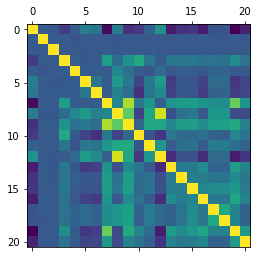

In [18]:
# correlation between variables
# get a list of columns
cols = list(data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Churn')))
cols
corrdata = data.loc[:, cols]

plt.matshow(corrdata.corr())

corr = corrdata.corr()
corr.style.background_gradient()

In [23]:
# build function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1) # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)   # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") #Show legend of the plot at the best location possible
    return plt # function that returns the plot as an output


# II. Model Building

## Decision Tree

In [20]:
## Using optimal recall socoring to find best parameters for decision tree model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets
gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7, 8, 9,10,11,12,13,14,15,None],
                              'criterion':["gini","entropy"],
                              'splitter':["best","random"],
                              'min_impurity_decrease':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}],
                  scoring='recall', 
                  cv=10)
gs_tree = gs_tree.fit(X_train,y_train)
print(gs_tree.best_score_)
print(gs_tree.best_params_)

0.6171583902964433
{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.0001, 'splitter': 'best'}


In [28]:
## Using optimal accuracy socoring to find best parameters for decision tree model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets
gs_tree1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7, 8, 9,10,11,12,13,14,15,None],
                              'criterion':["gini","entropy"],
                              'splitter':["best","random"],
                              'min_impurity_decrease':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}],
                  scoring='accuracy', 
                  cv=10)
gs_tree1 = gs_tree1.fit(X_train,y_train)
print(gs_tree1.best_score_)
print(gs_tree1.best_params_)

0.7927671678179602
{'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0005, 'splitter': 'random'}


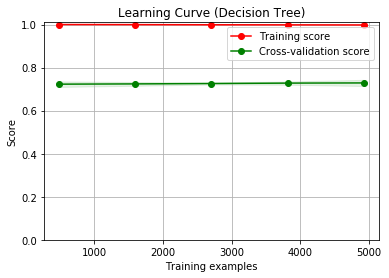

In [25]:
# learning curve of decision tree
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt


title = "Learning Curve (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

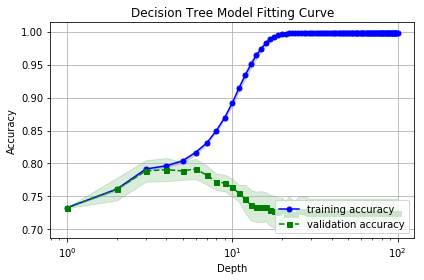

In [29]:
# using fitting curve to detect over-fitting problem
from sklearn.model_selection import validation_curve

np.random.seed(42) #the seed used by the random number generator for np

param_range = list(range(1,101))

train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42), #Build Logistic Regression Models
                X=X_train, 
                y=y_train, 
                param_name="max_depth",
                param_range=param_range,
                cv=10,    
                scoring="accuracy", 
                n_jobs=4) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters max_depth in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.title("Decision Tree Model Fitting Curve")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
#plt.ylim([0.9, 1.0]) # y limits in the plot
plt.tight_layout() # Ensures all labels fit in the graph - used to make thr graph look better
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           #display the figure


# Logistic Regression 

In [22]:
## Using optimal recall socoring to find best parameters for LR model 
from sklearn.linear_model import LogisticRegression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
                               'penalty':["l1","l2"]}],
                  scoring='recall',
                  cv=10)

gs_lr = gs_lr.fit(X_train,y_train)
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.566915721949904
{'C': 100000, 'penalty': 'l2'}


In [31]:
## Using optimal accuracy socoring to find best parameters for LR model 
from sklearn.linear_model import LogisticRegression
gs_lr1 = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
                               'penalty':["l1","l2"]}],
                  scoring='accuracy',
                  cv=10)

gs_lr1 = gs_lr1.fit(X_train,y_train)
print(gs_lr1.best_score_)
print(gs_lr1.best_params_)

0.8084112149532711
{'C': 0.01, 'penalty': 'l2'}


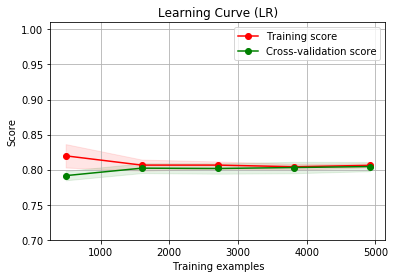

In [27]:
# learning curve of LR model
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt


title = "Learning Curve (LR)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

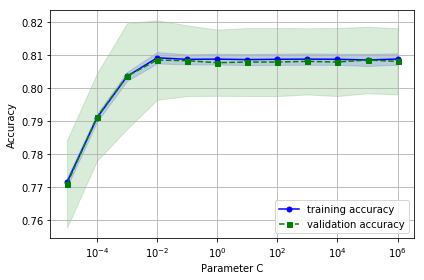

In [19]:
# using fitting curve to detect over-fitting problem

param_range = [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000]

train_scores, test_scores = validation_curve( 
                estimator=LogisticRegression(random_state=42), 
                X=X_train, 
                y=y_train, 
                param_name="C",
                param_range=param_range,
                cv=10,    
                scoring="accuracy", 
                n_jobs=4) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.9, 1.0]) # y limits in the plot
plt.tight_layout() # Ensures all labels fit in the graph - used to make thr graph look better
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           #display the figure


# k-NN 

In [24]:
## Using optimal recall socoring to find best parameters for k-NN model 
from sklearn.preprocessing import StandardScaler

#Normalize Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Choosing k for kNN
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                              'weights':['uniform','distance'],
                              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}],
                  scoring='recall',
                  cv=10,
                  n_jobs=4)
#print(len(y))
gs_knn = gs_knn.fit(X_train_std, y_train)          
print(gs_knn.best_score_)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)

0.5440856073224842
{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


In [30]:
## Using optimal accuracy socoring to find best parameters for k-NN model 
from sklearn.preprocessing import StandardScaler
#Normalize Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Choosing k for kNN
gs_knn1 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                              'weights':['uniform','distance'],
                              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)
#print(len(y))
gs_knn1 = gs_knn1.fit(X_train_std, y_train)          
print(gs_knn1.best_score_)
print(gs_knn1.best_params_)
print(gs_knn1.best_estimator_)

0.7834213734254368
{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')


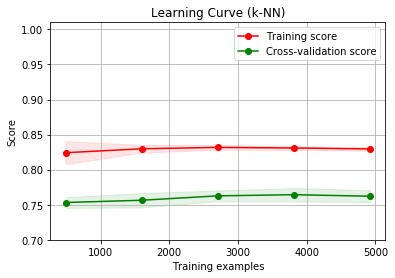

In [29]:
# learning curve of k-NN
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt


title = "Learning Curve (k-NN)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

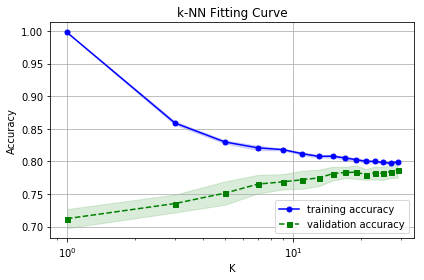

In [32]:
# using fitting curve to detect over-fitting problem
from sklearn.model_selection import validation_curve

np.random.seed(42) #the seed used by the random number generator for np

param_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

train_scores, test_scores = validation_curve( 
                estimator=neighbors.KNeighborsClassifier(p=2, metric='minkowski'), #Build Logistic Regression Models
                X=X_train_std, 
                y=y_train, 
                param_name="n_neighbors",
                param_range=param_range,
                cv=10,    
                scoring="accuracy", 
                n_jobs=4) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters k in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.title("k-NN Fitting Curve")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.tight_layout() # Ensures all labels fit in the graph - used to make thr graph look better
plt.show()           #display the figure


# III. Algorithem selection with nested cross-validation

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score

np.random.seed(42)


scores=cross_val_score(gs_knn, X_train_std, y_train, 
                         scoring='recall', cv=5)
print('k-NN CV recall: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


scores=cross_val_score(gs_tree, X_train, y_train, 
                         scoring='recall', cv=5)
print('Decision tree CV recall: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))
scores=cross_val_score(gs_lr, X_train, y_train, 
                         scoring='recall', cv=5)
print('LR CV recall: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

k-NN CV recall: 0.517 +/- 0.034
Decision tree CV recall: 0.617 +/- 0.048
LR CV recall: 0.565 +/- 0.038


In [36]:
import numpy as np
from sklearn.model_selection import cross_val_score

np.random.seed(42)


scores=cross_val_score(gs_knn1, X_train_std, y_train, 
                         scoring='accuracy', cv=5)
print('k-NN CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


scores=cross_val_score(gs_tree1, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('Decision tree CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))
scores=cross_val_score(gs_lr1, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('LR CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

k-NN CV accuracy: 0.777 +/- 0.010
Decision tree CV accuracy: 0.795 +/- 0.011
LR CV accuracy: 0.807 +/- 0.011


According to the result of cross validation, we choose decision tree.

# IV. Evaluation

In [17]:
# apply the final best model we choose to test set to estimate the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dtree=DecisionTreeClassifier(criterion='gini',max_depth=2,min_impurity_decrease=0.0001,splitter='best')
dtree.fit(X_train,y_train)
y_pred_tree = dtree.predict(X_test)

matrix=confusion_matrix(y_test, y_pred_tree)
cfn_matrix=pd.DataFrame(
    confusion_matrix(y_test, y_pred_tree),
    columns=['Predicted Not Churn','Predicted Churn'],
    index=['True Not Churn','True Churn'])

print("Confusion Matrix:\n", 
      cfn_matrix)
print ("Accuracy(%) : ", accuracy_score(y_test,y_pred_tree)*100)
error=(matrix[0,1]+matrix[1,0])/y_test.count()*100
print("Classification error(%):",error)
print("Report :", classification_report(y_test, y_pred_tree,target_names=['Not Churn','Churn']))

Confusion Matrix:
                 Predicted Not Churn  Predicted Churn
True Not Churn                 1262              293
True Churn                      204              351
Accuracy(%) :  76.44549763033174
Classification error(%): 23.554502369668246
Report :              precision    recall  f1-score   support

  Not Churn       0.86      0.81      0.84      1555
      Churn       0.55      0.63      0.59       555

avg / total       0.78      0.76      0.77      2110



# V. Visualizing Tree Model

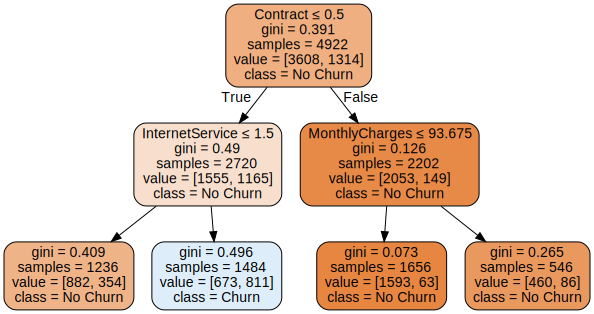

In [19]:
from sklearn.tree import export_graphviz
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=['gender','Partner','PhoneService','PaperlessBilling','SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'],  
                         class_names=['No Churn','Churn'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph